### Data analysis of Section 7 data.

1. Check all surface maps without thermal compensation (250113)
1. group the surface maps ...., calculate averages and sub-averages,... decide on the sampling parameters to use for all future tests


In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

plt.set_cmap('jet')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [2]:
_, _ = parse_ml_data_folder('%s/Sec 7/'%(ml_data_dir))

Mon Jan 13 10:15:04 2025 	 1st run/50x2/250113 GMT3 set1 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:18:15 2025 	 1st run/50x2/250113 GMT3 set2 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:21:13 2025 	 1st run/50x2/250113 GMT3 set3 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:23:56 2025 	 1st run/50x2/250113 GMT3 set4 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:26:39 2025 	 1st run/50x2/250113 GMT3 set5 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:29:22 2025 	 1st run/50x2/250113 GMT3 set6 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:32:05 2025 	 1st run/50x2/250113 GMT3 set7 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:34:48 2025 	 1st run/50x2/250113 GMT3 set8 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:37:32 2025 	 1st run/50x2/250113 GMT3 set9 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 10:40:16 2025 	 1st run/50x2/250113 GMT3 set10 50frames 2sec gmtMorph170614 -.h5
Mon Jan 13 12:32:38 2025 	 1st run/30x2a/250113 GMT3 set1 30frames 2sec gmtMorph170614 -.

### 30 samples @ 2s

In [196]:
dateID = '250113'
#subfolder = '1st run/50x2'  #~10:30am #buddy looked in his slides
#subfolder = '1st run/30x2a' #~12:30pm #buddy showed in his slides for 30x2. winner.
#subfolder = '1st run/30x2'  #~1:05pm 
subfolder = '1st run/60x1'  #~1:50pm #buddy looked in his slides
##subfolder = '1st run/30x5'  #~2:50pm #buddy looked in his slides; last sample jumped.

#subfolder = '2nd run/30x2'  #~3:20pm

nMeasure = 10
#for making plots for the report, ignore No. 11 below
#if '30x2a' in subfolder:
#    nMeasure= 11

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set1 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:41:52 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set2 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:44:05 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set3 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:46:18 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set4 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:48:31 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set5 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:50:44 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set6 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:52:57 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/dat

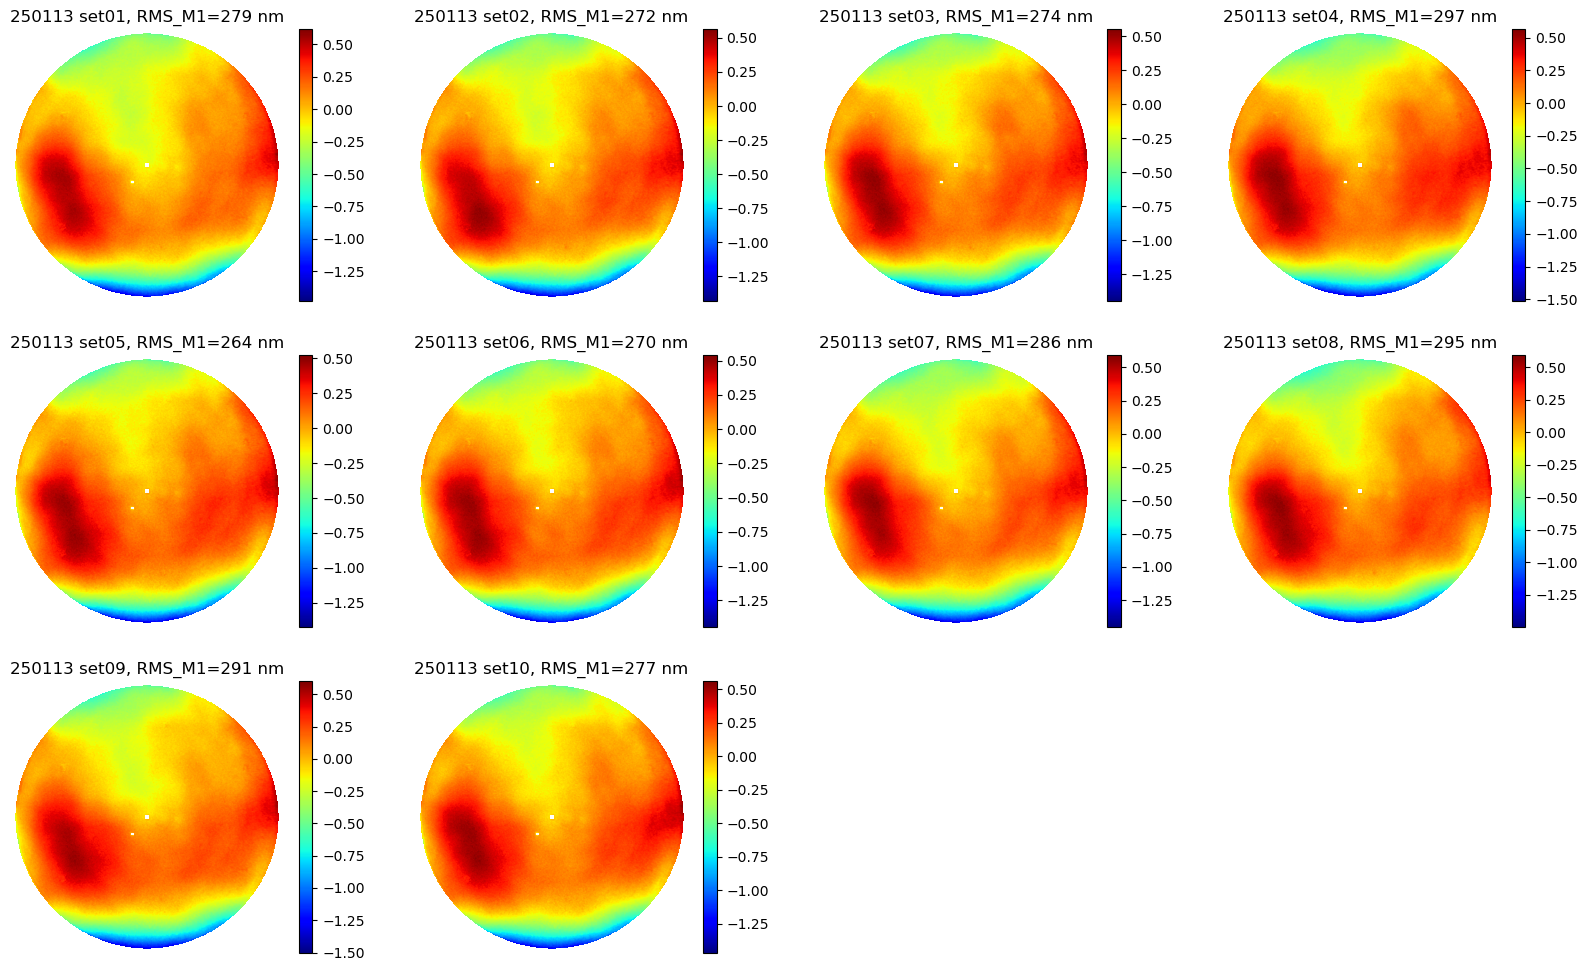

In [197]:
m1s_array = np.zeros((Sxn, Syn, nMeasure))

nrow = int(np.ceil(nMeasure/4.))
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))

ts_array = []
for i in range(nMeasure):
    globstring = '%s/Sec 7/%s/*set%d *.h5'%(ml_data_dir, subfolder, i+1) 
    #print(globstring)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset)
    ts_array.append(ts)
    m1s_array[:,:, i] = m1s
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
for i in range(nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set1 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:41:52 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set2 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:44:05 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set3 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:46:18 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set4 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:48:31 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set5 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:50:44 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 7/1st run/60x1/250113 GMT3 set6 60frames 1sec gmtMorph170614 -.h5: Mon Jan 13 13:52:57 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/dat

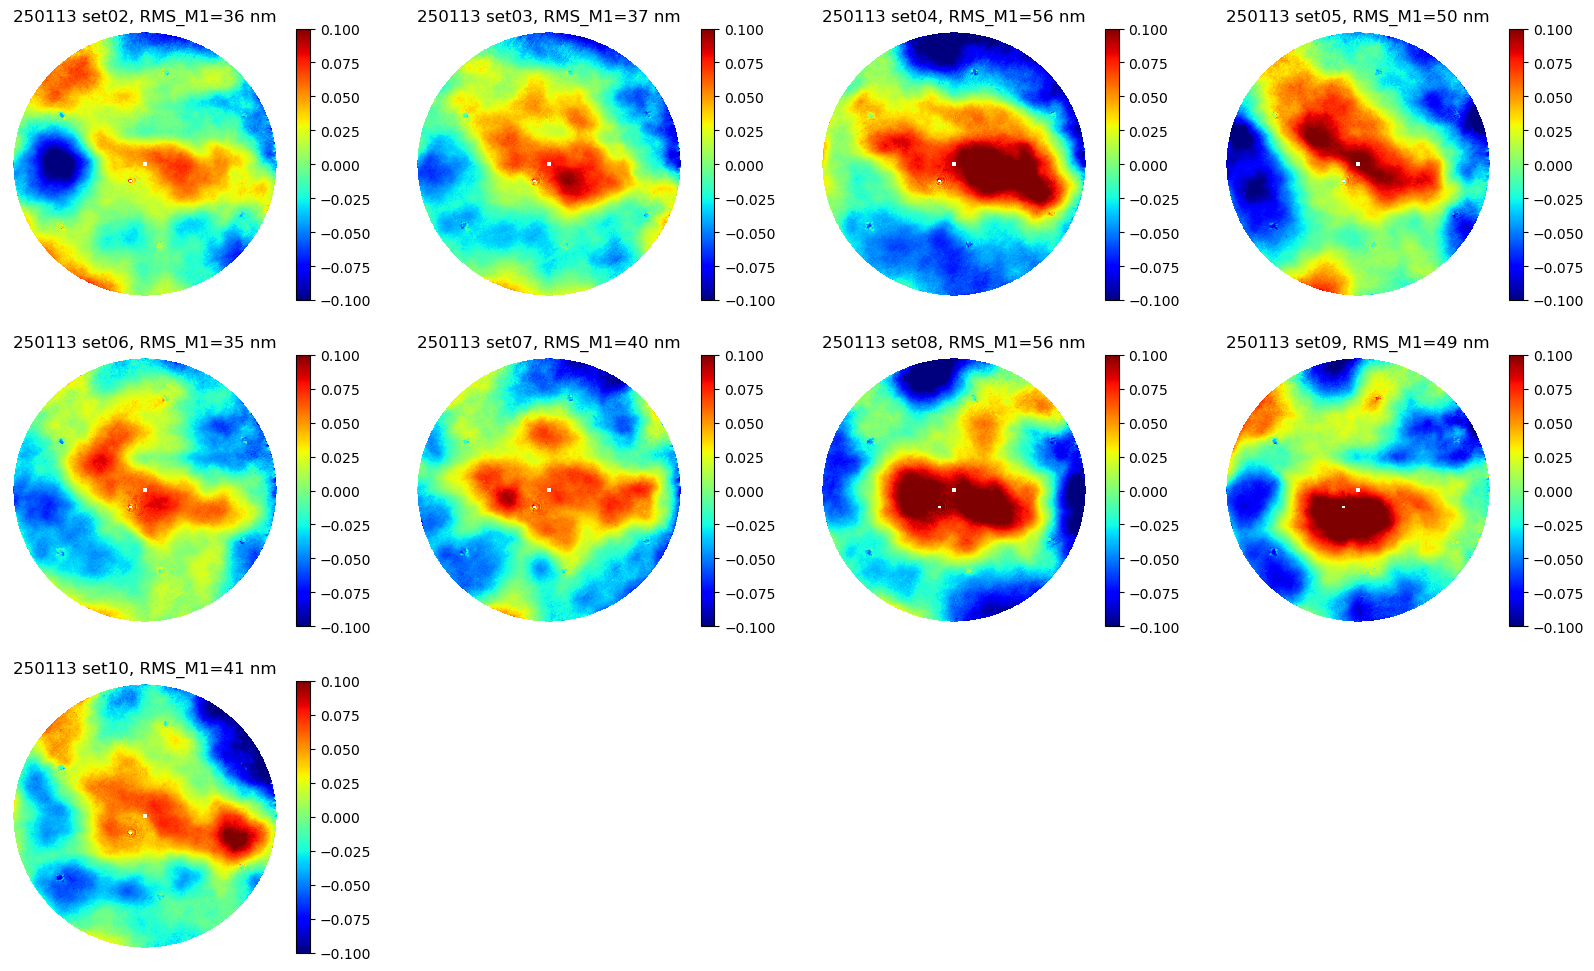

In [198]:
#here we first plot the change between subsequent measurements. Not subtracting average yet
nrow = int(np.ceil(nMeasure/4.))
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))

for i in range(nMeasure):
    globstring = '%s/Sec 7/%s/*set%d *.h5'%(ml_data_dir, subfolder, i+1) 
    #print(globstring)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset)
    if i==0:
        m1sPrev = m1s.copy()
    else:
        irow = np.int8((i-1)/4)
        icol = np.mod((i-1),4)
        #print(irow, icol)
        
        temp = m1s.copy()
        m1s -= m1sPrev
        
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    
        img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-.1, vmax=.1)
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
for i in range(nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

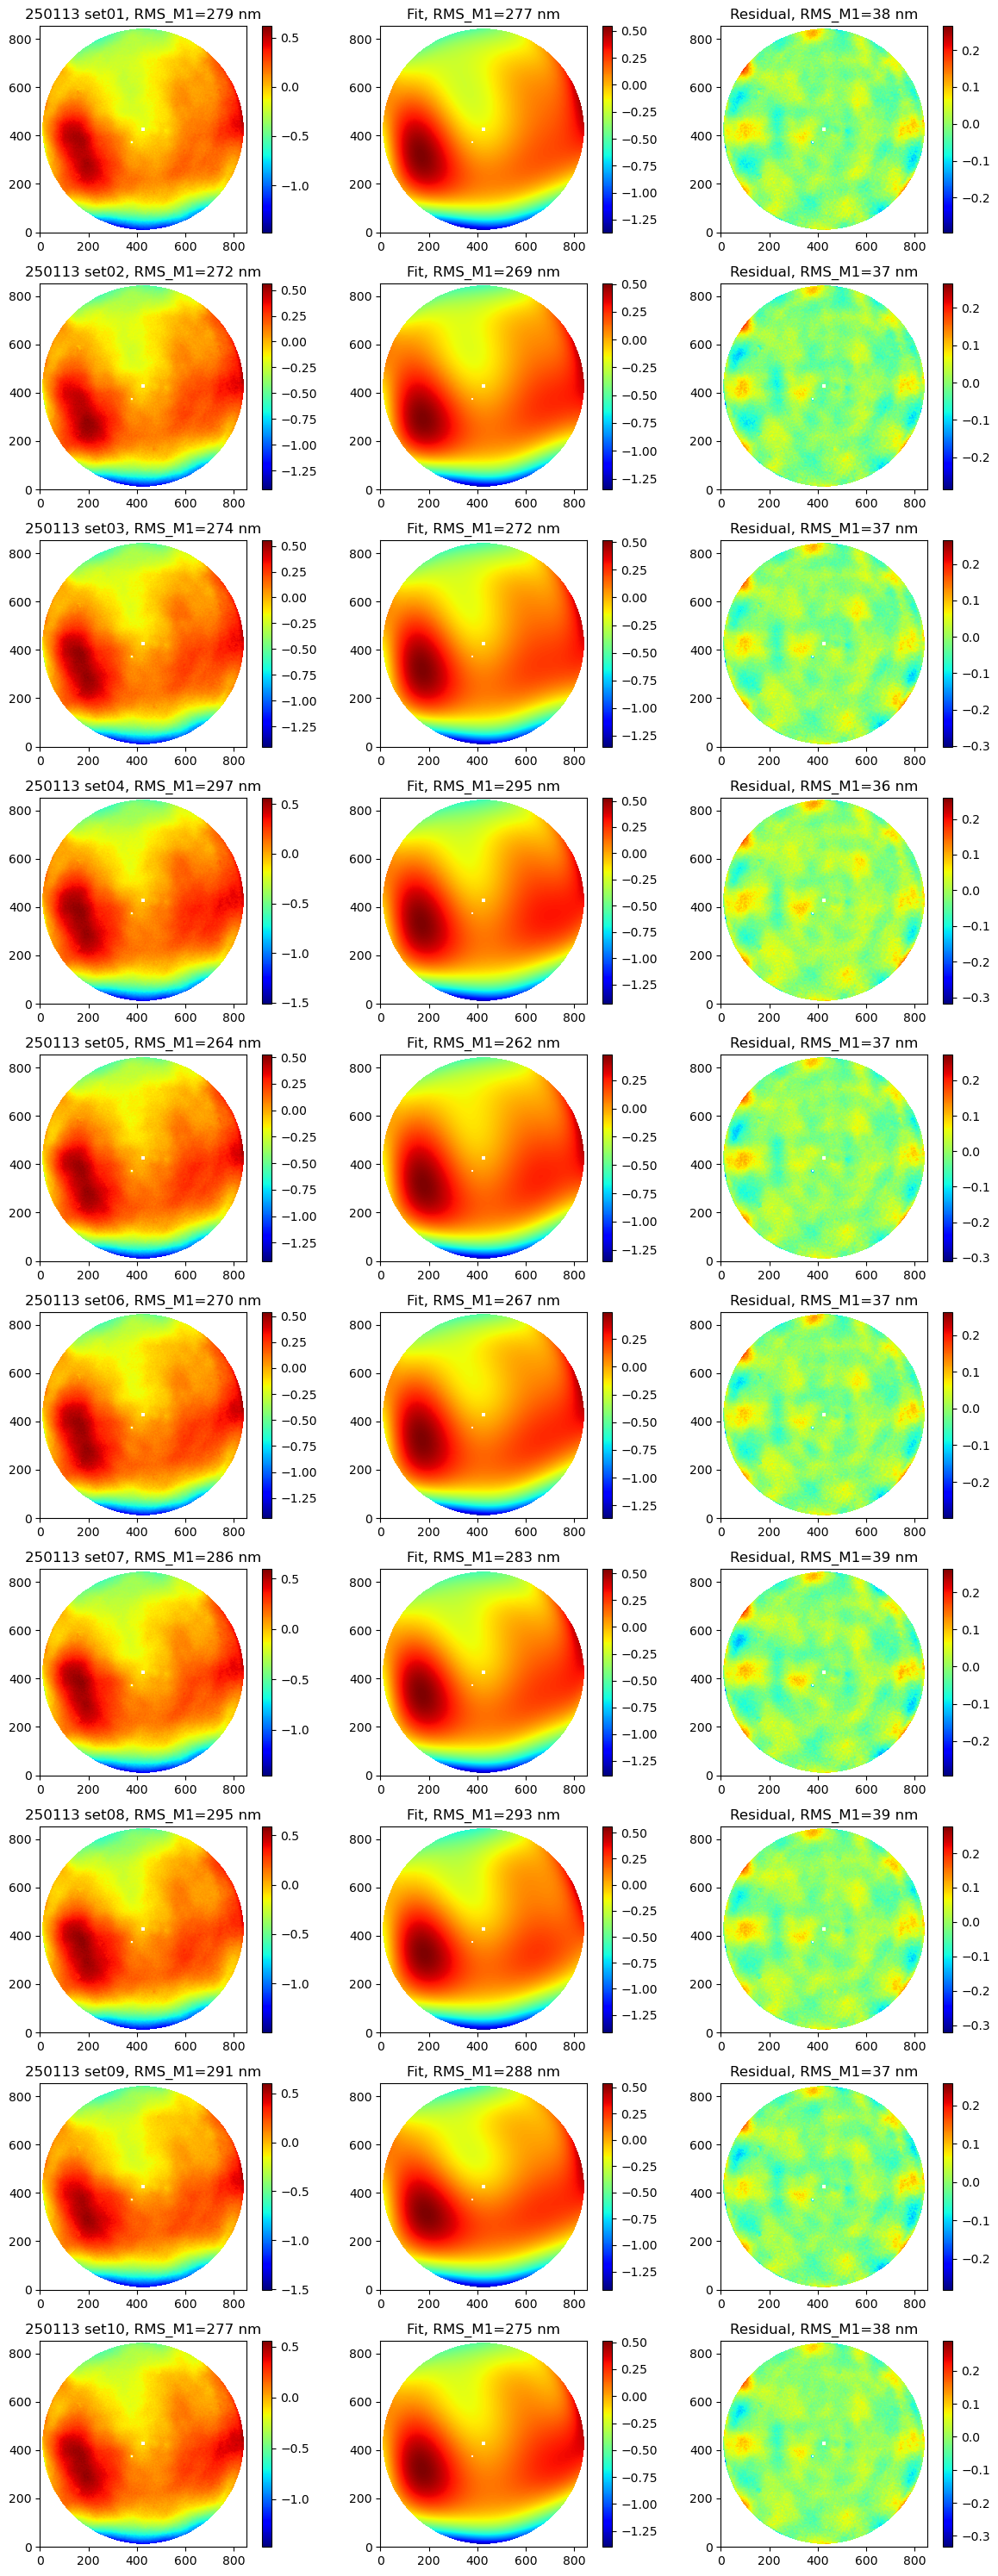

In [199]:
nzer = 37
zercoeff = np.zeros((nMeasure, nzer))

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for i in range(nzer):
    zerU[:,i] = zernike_polynomial(i+1, x1/radius_of_CA, y1/radius_of_CA).flatten()

nrow = nMeasure
fig, ax = plt.subplots(nrow,3,figsize=(12,3*nrow))
ts_array = []
for i in range(nMeasure):
    irow = i
    globstring = '%s/Sec 7/%s/*set%d *.h5'%(ml_data_dir, subfolder, i+1)
    fileset = sorted(glob.glob(globstring))
    #print(glob_string, fileset)
    if len(fileset)>0:
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        ts_array.append(ts)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        icol = 0
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
        
        icol = 1
        maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
        nnodesNew = np.sum(maskNew)
        zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]
        recon = np.zeros_like(m1s)
        recon[~maskNew] = np.nan
        for k in range(nzer):
            recon[maskNew] += zercoeff[i,k]*zerU[maskNew.flatten(),k]  
        img = ax[irow][icol].imshow(recon, origin='lower')          
        fig.colorbar(img, ax=ax[irow][icol])
        m1rms = np.std(recon[~np.isnan(recon)])*1000 #convert into nm
        ax[irow][icol].set_title('Fit, RMS_M1=%.0f nm'%(m1rms))
        
        icol = 2
        resi = m1s - recon
        img = ax[irow][icol].imshow(resi, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])        
        m1rms = np.std(resi[~np.isnan(resi)])*1000 #convert into nm
        ax[irow][icol].set_title('Residual, RMS_M1=%.0f nm'%(m1rms))        
plt.tight_layout()

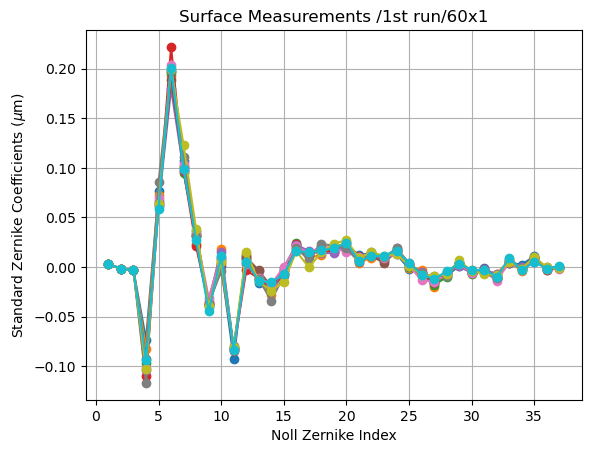

In [200]:
plt.plot(np.arange(1, nzer+1), zercoeff.T,'-o')
plt.ylabel(r'Standard Zernike Coefficients ($\mu$m)')
plt.xlabel('Noll Zernike Index')
plt.title('Surface Measurements /%s'%subfolder)
plt.grid();

In [201]:
ntsamples = 100
start_time = unix_ts(ts_array[0])-60*2 #2 minute before starting the first measurement
end_time = unix_ts(ts_array[-1])+60*2 #2 minute after the last measurement

# get TC data
tc, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/tc_temperature/value', 
                   duration_in_s=end_time-start_time, samples=ntsamples)
tambient, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/ambient_temperature/value', 
                         duration_in_s=end_time-start_time, samples=ntsamples)
idxfo = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) > 4
idxfi = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) < 1
idxbo = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) > 4
idxbi = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) < 1

# Compute elapsed time in minutes from t0
t0 = tt[0]  # Start time (first timestamp)
tt_minutes = (tt - t0) / 60  # Convert to minutes
ts_minutes = ([unix_ts(t) for t in ts_array] - t0) / 60  # Convert ts_array to minutes

m1_s1_thermal_ctrl/i/tc_temperature/value
2025-01-13 13:39:52  duration =  1438  s
(72, 192)
m1_s1_thermal_ctrl/i/ambient_temperature/value
2025-01-13 13:39:52  duration =  1438  s
(72,)


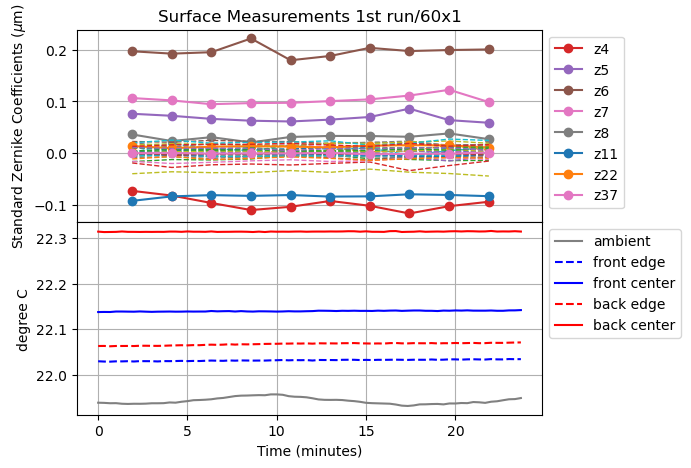

In [202]:
fig, ax = plt.subplots(2,1,figsize=(6,5), sharex=True)
for i in range(nzer):
    if (i+1) in [4,5,6,7,8,11,22,37]:
        ax[0].plot(ts_minutes, zercoeff[:,i],'-o',label='z%d'%(i+1))
    else:
        ax[0].plot(ts_minutes, zercoeff[:,i],'--', linewidth=1)
ax[0].set_ylabel(r'Standard Zernike Coefficients ($\mu$m)')
ax[1].set_xlabel('Time (minutes)')
ax[0].set_title('Surface Measurements %s'%subfolder)
tt = np.array([unix_ts(ts)/60. for ts in ts_array])
tt -= tt[0]
tt = ['%.1f'%i for i in tt]
#ax[1].set_xticks(np.arange(1,nMeasure+1,2), tt[::2])
ax[0].legend(bbox_to_anchor=(1, 1))
ax[0].grid()

ax[1].plot(tt_minutes, tambient, 'grey', label='ambient')
ax[1].plot(tt_minutes, np.mean(tc[:,idx_mirror_f][:,idxfo], axis=1), '--b', label='front edge')
ax[1].plot(tt_minutes, np.mean(tc[:,idx_mirror_f][:,idxfi], axis=1), '-b', label='front center')
ax[1].plot(tt_minutes, np.mean(tc[:,idx_mirror_b][:,idxbo], axis=1), '--r', label='back edge')
ax[1].plot(tt_minutes, np.mean(tc[:,idx_mirror_b][:,idxbi], axis=1), '-r', label='back center')
ax[1].legend(bbox_to_anchor=(1, 1)) #ncol=5) #, framealpha=0.7)
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('degree C')
ax[1].grid()
plt.subplots_adjust(hspace=0)

In [203]:
m1s_ave = np.mean(m1s_array[:,:,:nMeasure//2*2], axis=2) #if there is #11 map, leave it out
m1s_ave2 = np.zeros((Sxn, Syn, nMeasure//2))
for i in range(nMeasure//2):
    print(2*i, 2*(i+1))
    m1s_ave2[:,:, i] = np.mean(m1s_array[:,:, 2*i:2*(i+1)], axis=2)
m1s_ave5 = np.zeros((Sxn, Syn, nMeasure//5))
for i in range(nMeasure//5):
    print('-- ', 5*i, 5*(i+1))
    m1s_ave5[:,:, i] = np.mean(m1s_array[:,:, 5*i:5*(i+1)], axis=2)    

0 2
2 4
4 6
6 8
8 10
--  0 5
--  5 10


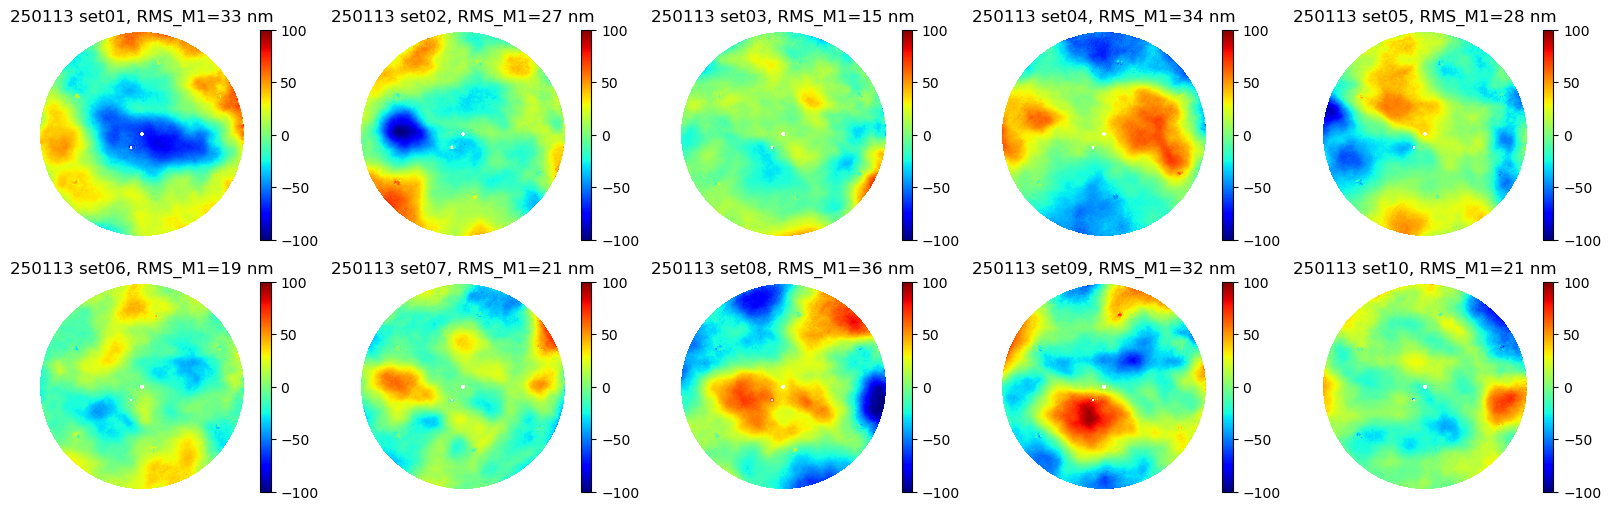

In [204]:
rms_array = []
nrow = int(np.ceil(nMeasure/5.))
fig, ax = plt.subplots(nrow,5,figsize=(20,3*nrow))

for i in range(nMeasure):

    m1s = m1s_array[:,:,i] - m1s_ave
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    rms_array.append([1, m1rms])
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    
    img = ax[irow][icol].imshow(m1s*1000, origin='lower', vmin=-100, vmax=100)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
for i in range(nrow*5):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    ax[irow][icol].axis('off')

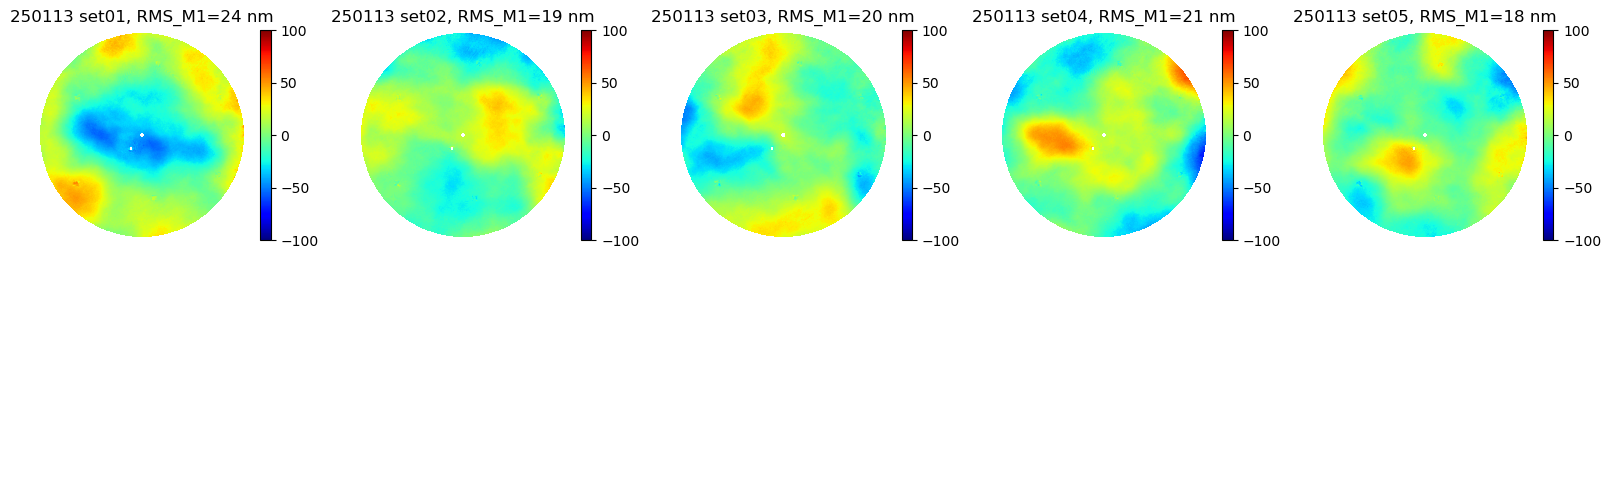

In [205]:
nrow = int(np.max((2, np.ceil(nMeasure//2/5.))))
fig, ax = plt.subplots(nrow,5,figsize=(20,3*nrow))

for i in range(nMeasure//2):

    m1s = m1s_ave2[:,:,i] - m1s_ave
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    rms_array.append([2, m1rms])
    
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    
    img = ax[irow][icol].imshow(m1s*1000, origin='lower', vmin=-100, vmax=100)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
for i in range(nrow*5):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    ax[irow][icol].axis('off')

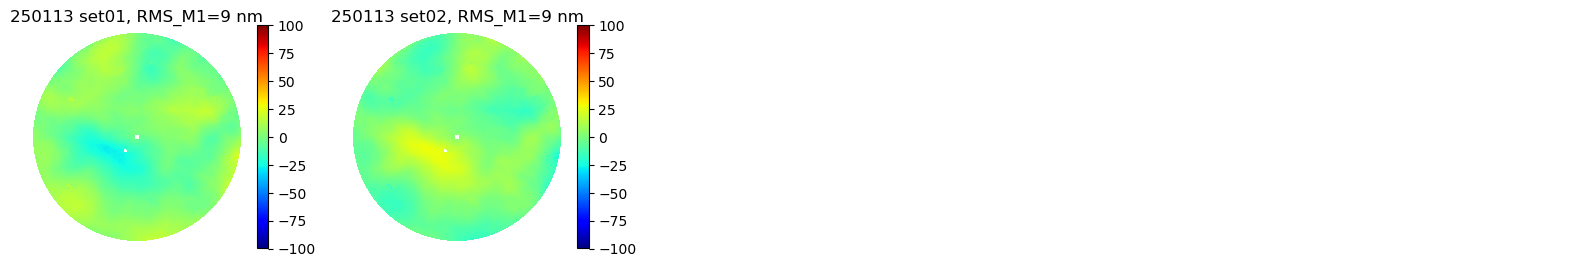

In [206]:
fig, ax = plt.subplots(1,5,figsize=(20,2.9))

for i in range(2):

    m1s = m1s_ave5[:,:,i] - m1s_ave
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    rms_array.append([5, m1rms])
    
    img = ax[i].imshow(m1s*1000, origin='lower', vmin=-100, vmax=100)
    fig.colorbar(img, ax=ax[i])
    ax[i].set_title('%s set%02d, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
for i in range(5):
    ax[i].axis('off')

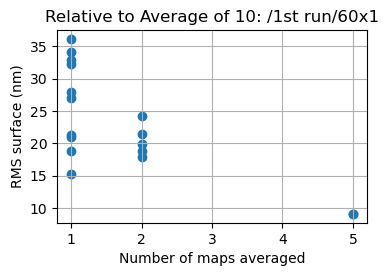

In [207]:
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
rms_array_plot = np.array(rms_array)
plt.scatter(rms_array_plot[:,0], rms_array_plot[:,1])
plt.title('Relative to Average of 10: /%s'%subfolder)
plt.ylabel('RMS surface (nm)')
plt.xlabel('Number of maps averaged')
plt.xticks(range(1,6))
plt.grid();